## 原理 Principle

使用分类模型来预测股票的涨跌主要是通过对历史数据的分析，建立一个模型来预测未来股票价格是上涨还是下跌。

The use of classification models to predict stock price movements primarily involves analyzing historical data to build a model that forecasts whether the stock price will rise or fall in the future.

### 特征选择 Feature Selection
选择与股价相关的自变量（特征）。这些特征可以是：

Select independent variables (features) related to stock prices. These features can include:
- 历史股价数据（如过去几天的收盘价等时间序列数据）
- 技术指标（如移动平均线、相对强弱指数等）
- 公司财务数据（如市盈率、盈利增长等）
- 宏观经济指标（如利率、GDP 增长率等）
- 社会经济数据（如新闻情绪分析、行业趋势等）
- Historical stock price data (e.g., time-series data like closing prices over the past few days)
- Technical indicators (e.g., moving averages, relative strength index)
- Company financial data (e.g., price-to-earnings ratio, earnings growth)
- Macroeconomic indicators (e.g., interest rates, GDP growth rate)
- Socioeconomic data (e.g., news sentiment analysis, industry trends)

## 代码 Code

### 数据预览 Data Overview

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Download historical data for the NASDAQ index
# 下载纳斯达克指数的历史数据
symbol = "^IXIC"
nasdaq = yf.download(symbol, start="2024-01-01")
nasdaq.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,14873.700195,14887.799805,14682.379883,14765.940430,14765.940430,5791170000
2024-01-03,14641.469727,14694.580078,14577.440430,14592.209961,14592.209961,5449950000
2024-01-04,14532.230469,14632.769531,14504.780273,14510.299805,14510.299805,5289220000
2024-01-05,14500.110352,14625.190430,14477.570312,14524.070312,14524.070312,5232820000
2024-01-08,14564.469727,14846.900391,14560.200195,14843.769531,14843.769531,6337770000


<Axes: xlabel='Date'>

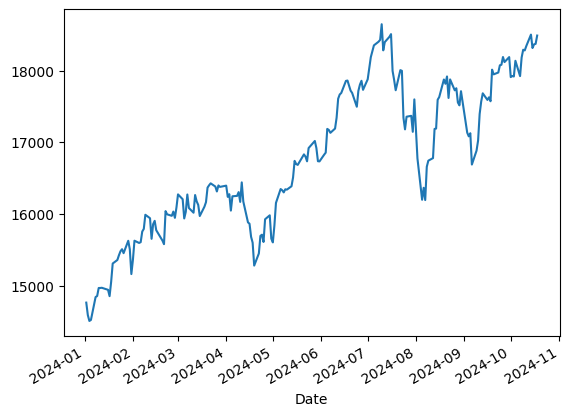

In [2]:
nasdaq['Close'].plot()

### 评估涨跌效果 Assessment of Prediction

根据近7天数据预测下一天跌还是涨

Predict whether the stock will rise or fall the next day based on the data of the past 7 days.

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

def prepare_classification_labels(y):
    """
    Convert stock prices into binary classification labels based on price movement.
    将股价转换为二分类标签：上涨(1) 或 下跌(0)
    """
    labels = []
    for i in range(1, len(y)):
        if y[i] > y[i - 1]:  # Price went up
            labels.append(1)
        else:  # Price went down or stayed the same
            labels.append(0)
    return np.array(labels)

def predict_stock_trend(X, y):
    X = np.array(X)
    y = np.array(y)

    # Convert the continuous target (y) into classification labels (1 for up, 0 for down)
    # 将连续的目标 (y) 转换为分类标签 (1 表示上涨，0 表示下跌)
    y_class = prepare_classification_labels(y)

    # Ensure that X and y_class have the same length (due to the shifting in prepare_classification_labels)
    # Since prepare_classification_labels skips the first value
    # 保证X和y长度相同，去掉第一个无法预测的点
    X = X[1:]  

    # Split the data into training and testing datasets
    # 将数据划分为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, shuffle=False)
    
    # Define models to compare
    # 定义要对比的模型
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42),
        'Support Vector Classifier': SVC(),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Gradient Boosting Classifier': GradientBoostingClassifier(),
        'MLP Classifier': MLPClassifier(hidden_layer_sizes=2 * [256], learning_rate_init=0.01, max_iter=10000)
    }

    # Initialize a dictionary to store results
    # 初始化一个字典来存储结果
    results = {}

    # Train, predict, and evaluate each model
    # 针对每个模型进行训练、预测和评估
    for model_name, model in models.items():
        # Train the model
        # 训练模型
        model.fit(X_train, y_train)

        # Make predictions
        # 对测试集进行预测
        y_pred = model.predict(X_test)

        # Calculate accuracy
        # 计算预测的准确率
        accuracy = accuracy_score(y_test, y_pred)

        # Generate classification report
        # 生成分类报告
        class_report = classification_report(y_test, y_pred, zero_division=0)

        # Calculate confusion matrix
        # 生成混淆矩阵
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Store the results
        # 存储结果
        results[model_name] = {'Accuracy': accuracy, 'Classification Report': class_report, 'Confusion Matrix': conf_matrix}

    # Print the results for each model
    # 打印每个模型的结果
    for model_name, metrics in results.items():
        print(f"{model_name}:")
        print(f"Accuracy: {metrics['Accuracy']*100:.2f}%")
        print(results[model_name]['Confusion Matrix'])
        print()

### 收盘价 Close Price

In [4]:
# Use only the closing prices
# 只使用收盘价
close_prices = nasdaq['Close']

# Prepare features (X) and target (y) data
# 前7天的收盘价作为特征，第8天的收盘价作为目标
window_size = 7
X = []
y = []

for i in range(len(close_prices) - window_size):
    # Extract the window of 7 days of closing prices and volumes as features
    # 提取前7天的收盘价和成交量作为特征
    closing_window = close_prices.iloc[i:i + window_size].values
    X.append(closing_window)
    
    # The 8th day's closing price as the target
    # 提取第8天的收盘价作为目标
    y.append(close_prices.iloc[i + window_size])

predict_stock_trend(X, y)

Logistic Regression:
Accuracy: 53.85%
[[ 4 11]
 [ 7 17]]

Random Forest:
Accuracy: 53.85%
[[ 1 14]
 [ 4 20]]

Support Vector Classifier:
Accuracy: 61.54%
[[ 0 15]
 [ 0 24]]

K-Nearest Neighbors:
Accuracy: 58.97%
[[ 3 12]
 [ 4 20]]

Gradient Boosting Classifier:
Accuracy: 53.85%
[[ 4 11]
 [ 7 17]]

MLP Classifier:
Accuracy: 38.46%
[[15  0]
 [24  0]]



## 成交量 Volume

In [5]:
# Use closing prices and volumes
# 收盘价和成交量
close_prices = nasdaq['Close']
volumes = nasdaq['Volume']

# Prepare features (X) and target (y) data
# 前7天的收盘价作为特征，第8天的收盘价作为目标
window_size = 7
X = []
y = []

for i in range(len(close_prices) - window_size):
    # Extract the window of 7 days of closing prices and volumes as features
    # 提取前7天的收盘价和成交量作为特征
    closing_window = close_prices.iloc[i:i + window_size].values
    volume_window = volumes.iloc[i:i + window_size].values
    features = np.concatenate([closing_window, volume_window])
    X.append(features)
    
    # The 8th day's closing price as the target
    # 提取第8天的收盘价作为目标
    y.append(close_prices.iloc[i + window_size])

predict_stock_trend(X, y)

Logistic Regression:
Accuracy: 56.41%
[[ 1 14]
 [ 3 21]]

Random Forest:
Accuracy: 61.54%
[[ 1 14]
 [ 1 23]]

Support Vector Classifier:
Accuracy: 61.54%
[[ 0 15]
 [ 0 24]]

K-Nearest Neighbors:
Accuracy: 61.54%
[[ 6  9]
 [ 6 18]]

Gradient Boosting Classifier:
Accuracy: 56.41%
[[ 4 11]
 [ 6 18]]

MLP Classifier:
Accuracy: 58.97%
[[ 0 15]
 [ 1 23]]



## 更多特征 More Features

In [6]:
# Use closing prices, volumes, high and low prices
# 使用收盘价、成交量、最高价和最低价
close_prices = nasdaq['Close']
volumes = nasdaq['Volume']
high_prices = nasdaq['High']
low_prices = nasdaq['Low']

# Prepare features (X) and target (y) data
# 前7天的收盘价、涨跌幅、成交量涨跌幅、最高价、最低价作为特征，第8天的收盘价作为目标
window_size = 7
X = []
y = []

for i in range(len(close_prices) - window_size):
    # Extract the window of 7 days of closing prices, volume, high, and low prices
    # 提取前7天的收盘价、成交量、最高价和最低价
    closing_window = close_prices.iloc[i:i + window_size].values
    volume_window = volumes.iloc[i:i + window_size].values
    high_window = high_prices.iloc[i:i + window_size].values
    low_window = low_prices.iloc[i:i + window_size].values

    # Calculate the percentage change (price and volume) for the last 7 days
    # 计算最近7天的价格涨跌幅和成交量涨跌幅，并用 fillna(0) 处理 NaN 值
    price_pct_change = close_prices.pct_change().fillna(0).iloc[i:i + window_size].values
    volume_pct_change = volumes.pct_change().fillna(0).iloc[i:i + window_size].values
    
    # Replace inf or -inf values with 0 to avoid issues
    # 将 inf 或 -inf 替换为 0 以避免问题
    volume_pct_change = np.where(np.isinf(volume_pct_change), 0, volume_pct_change)

    # Concatenate all features: closing prices, price percentage change, volume percentage change, high, and low prices
    # 将收盘价、价格涨跌幅、成交量涨跌幅、最高价和最低价合并为特征
    features = np.concatenate([closing_window, price_pct_change, volume_window, volume_pct_change, high_window, low_window])

    X.append(features)
    
    # The 8th day's closing price as the target
    # 提取第8天的收盘价作为目标
    y.append(close_prices.iloc[i + window_size])

predict_stock_trend(X, y)

Logistic Regression:
Accuracy: 56.41%
[[ 1 14]
 [ 3 21]]

Random Forest:
Accuracy: 61.54%
[[ 1 14]
 [ 1 23]]

Support Vector Classifier:
Accuracy: 61.54%
[[ 0 15]
 [ 0 24]]

K-Nearest Neighbors:
Accuracy: 61.54%
[[ 6  9]
 [ 6 18]]

Gradient Boosting Classifier:
Accuracy: 56.41%
[[ 4 11]
 [ 6 18]]

MLP Classifier:
Accuracy: 61.54%
[[ 0 15]
 [ 0 24]]

